In [13]:
import matplotlib
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
from matplotlib import colors
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 1.0}
figure = {'figsize' : [10.0, 10/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)

import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os #com
import glob2 as glob
from scipy.optimize import curve_fit # pacote para ajuste de curvas
from scipy.signal import find_peaks

In [14]:
#"_m" in the end means "measured"
#"_t" in the end means "theoretical"
#"_f" in the end means "fit"
positions_m = []

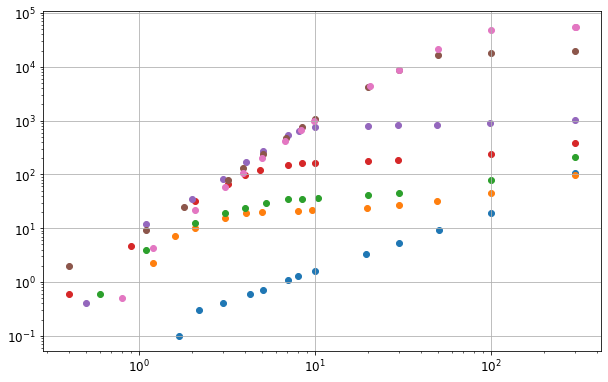

In [15]:
#dados 21/06

#I_15 = [0.1, 0.3, 1.2, 3.4, 11.5, 35.9, 44.7, 5.9, 0.1] #faltaram pontos
#V_15 = [1.0, 3.0, 10.2, 20.19, 99.7, 300, 367, 51.5, 1.5]

I_15 = np.array([0.1, 0.3, 0.4, 0.6, 0.7, 1.1, 1.3, 1.6, 3.3, 5.2, 9.1, 19.0, 104.4])
V_15 = np.array([1.7, 2.2, 3.0, 4.3, 5.1, 7.1, 8.0, 10.0, 19.5, 30.1, 50.7, 100.3, 302.0])

I_20 = np.array([2.3, 15.4, 20.2, 22.0, 27.1, 31.5, 44.3, 97.1, 10.0, 18.8, 21.0, 7.1, 24.2])
V_20 = np.array([1.2, 3.1, 5.0, 9.7, 30.3, 49.5, 100.5, 301, 2.1, 4.1, 8.0, 1.6, 19.7])

I_22 = np.array([0.6,3.9,12.4,19.4,24.0,29.6,34.6,35.5,36.4,41.0,45.7,80.1,210.9])
V_22 = np.array([0.6,1.1,2.1,3.1,4.0,5.3,7.1,8.5,10.5,20.1,30.0,99.7,300])

I_24 = np.array([0.6,4.6,31.8,66.1,119.4,96.0,151.3,161.2,166.1,179.3,187.8,236.5,380.4])
V_24 = np.array([0.4,0.9,2.1,3.2,4.9,4.0,7.1,8.5,10.1,20.1,29.9,100.1,301])

#I_25 = [11.4, 60.0, 490, 524, 538, 562, 638, 287, 135.5]
#V_25 = [1.0, 2.6, 9.9, 30.6, 50.9, 99.1, 299, 5.6, 3.9]

I_25 = np.array([0.4,11.8,35.2, 80.8,168.2,270.4,545,637,746,799,818,844,887,1021])
V_25 = np.array([0.5,1.1,2.0,3.0,4.1,5.1,7.1,8.1,10.0,20.1,29.9,49.8,99.4,300])

#I_30 = [15.0, 75, 236, 1090, 8480, 15900, 16820, 18260]
#V_30 = [1.1, 2.9, 5.0, 10.9, 29.5, 50.2, 99.8, 299]

I_30 = np.array([2.0,9.4,24.4,77.4,129.4,238.0,470.0,768,1087,4210,8680,16600,17710,19280])
V_30 = np.array([0.4,1.1,1.8,3.2,3.9,5.1,6.9,8.5,10.0,20.0,30.0,50.1,100.0,300])

I_31 = np.array([0.5,4.2,21.4,57.1,104.8,202.6,420,681,1004,4370,8660,21050,47500,54200,55200])
V_31 = np.array([0.8,1.2,2.1,3.1,3.9,5.0,6.8,8.4,9.9,20.5,30.0,50.1,99.9,300,304])

plt.yscale("log")
plt.xscale("log")
plt.grid(True)

plt.scatter(V_15, I_15)
plt.scatter(V_20, I_20)
plt.scatter(V_22, I_22)
plt.scatter(V_24, I_24)
plt.scatter(V_25, I_25)
plt.scatter(V_30, I_30)
plt.scatter(V_31, I_31)

In [16]:
#finding Richardson's data points
I_20_rich = I_20[I_20 > 21.0]
I_22_rich = I_22[I_22 > 35.0]
I_24_rich = I_24[I_24 > 160.0]
I_25_rich = I_25[I_25 > 750.0]
I_30_rich = I_30[I_30 > 17000.0]
I_31_rich = I_31[I_31 > 50000.0]

In [17]:
#finding Richardson's data points
I_20_rich_mean = np.mean(I_20[I_20 > 21.0])
I_22_rich_mean = np.mean(I_22[I_22 > 35.0])
I_24_rich_mean = np.mean(I_24[I_24 > 160.0])
I_25_rich_mean = np.mean(I_25[I_25 > 750.0])
I_30_rich_mean = np.mean(I_30[I_30 > 17000.0])
I_31_rich_mean = np.mean(I_31[I_31 > 50000.0])

#finding Child's data points
I_20_chi = I_20[I_20 <= 21.0]
I_22_chi = I_22[I_22 <= 35.0]
I_24_chi = I_24[I_24 <= 160.0]
I_25_chi = I_25[I_25 <= 750.0]
I_30_chi = I_30[I_30 <= 17000.0]
I_31_chi = I_31[I_31 <= 50000.0]
V_20_chi = V_20[I_20 <= 21.0]
V_22_chi = V_22[I_22 <= 35.0]
V_24_chi = V_24[I_24 <= 160.0]
V_25_chi = V_25[I_25 <= 750.0]
V_30_chi = V_30[I_30 <= 17000.0]
V_31_chi = V_31[I_31 <= 50000.0]
R_W = 0.27

I_24_chi_2 = I_24_chi[I_24_chi >= 10.0]
V_24_chi_2 = V_24_chi[I_24_chi >= 10.0]

# Calculating Temperature using Current
I_w = np.array([2.002, 2.253, 2.407, 2.500, 2.997, 3.151])
d = 0.01778  # cm or 0,1778 mm
a = I_w/(d**1.5)
T_i = 117 + 56*a**0.5 + 0.00036*a**1.8

# Calculating Temperature using resistance
x = np.array([2.448,2.654,2.767,2.844,3.240,3.351])/0.214
T_r = 112 + 202*x - 1.81*x**2

parameter names: ['c0', 'c1']
independent variables: ['Va']
[[Model]]
    Model(fir_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 7
    # variables        = 2
    chi-square         = 1114.12198
    reduced chi-square = 222.824395
    Akaike info crit   = 39.4893823
    Bayesian info crit = 39.3812026
[[Variables]]
    c0:  7.44628030 +/- 1.34188777 (18.02%) (init = 0)
    c1: -0.86655505 +/- 0.67823007 (78.27%) (init = 0)
[[Correlations]] (unreported correlations are < 0.300)
    C(c0, c1) =  0.930
OrderedDict([('c0', 7.446280302883245), ('c1', -0.8665550529942515)])
7.446280302883245 -0.8665550529942515
[ 10.61391214  17.48357114  38.04678804  61.06317259 103.11314763
  79.9414169  167.43460542]


Text(0.5, 1.0, "Data of electric current and anode potential for Child's Law (I=2.4 A)")

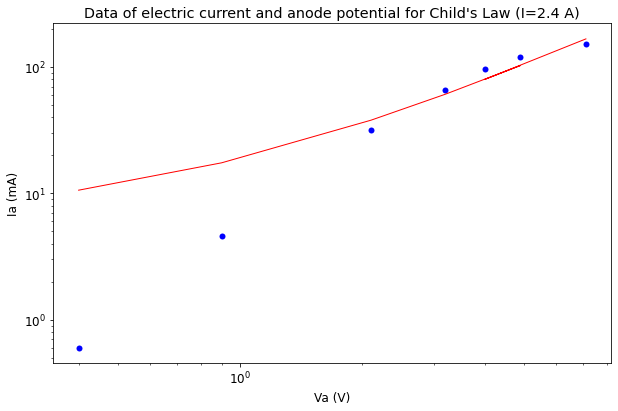

In [18]:
#5.12 - A plot of the space-charge limited thermionic emission in a FP-400 vacuum
#tube (Child’s law). The data was taken at a filament current of 2.4 A. Every other data
#point has been eliminated so the fit line is not obscured. Note that the fit line systematically
#misses the data, sometimes a bit high others a bit low. The measurement errors are tiny, so
#these small misses do result in a “too-large” χ
#Nevertheless, the law provides an excellent
#summary of the data over a huge range of variation.
I_all_child = np.concatenate((I_20_chi, I_22_chi, I_24_chi, I_25_chi, I_30_chi, I_31_chi))
V_all_child = np.concatenate((V_20_chi, V_22_chi, V_24_chi, V_25_chi, V_30_chi, V_31_chi))
fig = plt.figure()
ax = plt.gca()
list_lnV = []
list_lnI = []
for i in range(len(V_24_chi)):
    list_lnV.append(np.log(V_24_chi[i]))
    list_lnI.append(np.log(I_24_chi[i]))
######################################
###FIT
from lmfit import Model, Parameters

def fir_order(Va, c0, c1):
    return c0*((Va-c1)**1.5)

mod = Model(fir_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

params = mod.make_params(c0=0, c1 = 0)
result = mod.fit(I_24_chi, params, Va=V_24_chi)

print(result.fit_report(min_correl=0.3))
dic_result = result.params.valuesdict()
print(dic_result)
c0 = dic_result['c0']
c1 = dic_result['c1']

print(c0, c1)
x = V_24_chi
y = c0*((V_24_chi-c1)**1.5)
print(y)

#####################################

#ax.plot(V_all_child , I_all_child, 'o', c='blue', markeredgecolor='none')
ax.plot(V_24_chi , I_24_chi, 'o', c='blue', markeredgecolor='none')
ax.plot(x, y, 'r')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Va (V)')
ax.set_ylabel('Ia (mA)')
ax.set_title('Data of electric current and anode potential for Child\'s Law (I=2.4 A)')

parameter names: ['c0', 'c1']
independent variables: ['lnVa']
[[Model]]
    Model(fir_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.58939271
    reduced chi-square = 0.11787854
    Akaike info crit   = -13.3220091
    Bayesian info crit = -13.4301888
[[Variables]]
    c0: -5.27423771 +/- 0.17310524 (3.28%) (init = 2)
    c1:  1.99299067 +/- 0.13781777 (6.92%) (init = 1)
[[Correlations]] (unreported correlations are < 0.250)
    C(c0, c1) = -0.662
OrderedDict([('c0', -5.2742377145366675), ('c1', 1.9929906737423062)])
-5.2742377145366675 1.9929906737423062
[0.00082478 0.00415177 0.02247024 0.05202198 0.0811573  0.12161356
 0.2546699 ]


Text(0.5, 1.0, "Data of electric current and anode potential for Child's Law (I=2.4 A)")

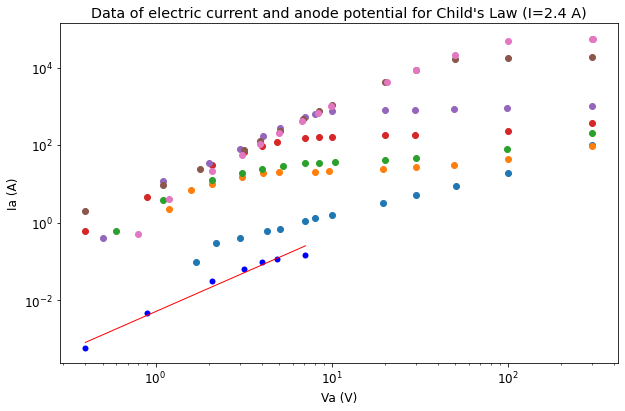

In [19]:
from lmfit import Model, Parameters

V_24_sort = np.sort(V_24_chi)
I_24_sort = np.sort(I_24_chi)


I_24_ampere = I_24_sort*1e-3
list_lnI = []
list_lnV = []
for i in range(len(V_24_sort)):
    list_lnV.append(np.log(V_24_sort[i]))
    list_lnI.append(np.log(I_24_ampere[i]))

def fir_order(lnVa, c0, c1):
    return c0 + c1*(lnVa)

mod = Model(fir_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

params = mod.make_params(c0=2, c1 = 1)
result = mod.fit(list_lnI, params, lnVa=list_lnV)

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
c0 = dic_result['c0']
c1 = dic_result['c1']

print(c0, c1)
x = V_24_sort
y = np.exp(c0)*((V_24_sort)**c1)
print(y)

plt.scatter(V_15, I_15)
plt.scatter(V_20, I_20)
plt.scatter(V_22, I_22)
plt.scatter(V_24, I_24)
plt.scatter(V_25, I_25)
plt.scatter(V_30, I_30)
plt.scatter(V_31, I_31)


plt.plot(V_24_sort , I_24_ampere, 'o', c='blue', markeredgecolor='none')
plt.plot(x, y, 'r')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Va (V)')
plt.ylabel('Ia (A)')
plt.title('Data of electric current and anode potential for Child\'s Law (I=2.4 A)')

[[Model]]
    Model(fir_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.58939271
    reduced chi-square = 0.11787854
    Akaike info crit   = -13.3220091
    Bayesian info crit = -13.4301888
[[Variables]]
    c0: -5.27423771 +/- 0.17310524 (3.28%) (init = 2)
    c1:  1.99299067 +/- 0.13781777 (6.92%) (init = 1)
[[Correlations]] (unreported correlations are < 0.250)
    C(c0, c1) = -0.662
OrderedDict([('c0', -5.2742377145366675), ('c1', 1.9929906737423062)])
[[Model]]
    Model(fir_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 7
    # variables        = 2
    chi-square         = 0.77501478
    reduced chi-square = 0.15500296
    Akaike info crit   = -11.4054833
    Bayesian info crit = -11.5136630
[[Variables]]
    c0: -5.66967239 +/- 0.30116887 (5.31%) (init = 2)
    c1:  1.06844207 +/- 0.24035960 (22.50

Text(0.5, 1.0, "Data of electric current and anode potential for Child's Law")

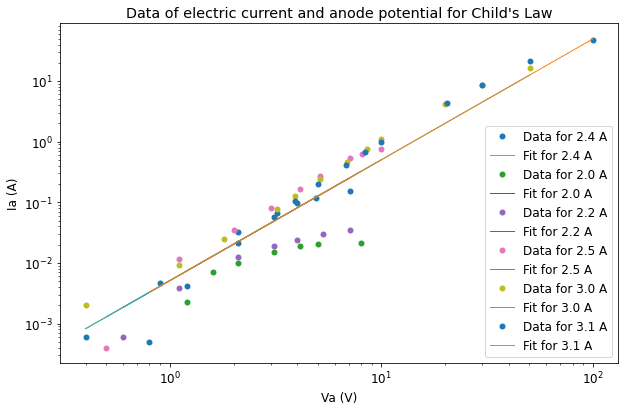

In [30]:
from lmfit import Model, Parameters

V_24_sort = np.sort(V_24_chi)
I_24_sort = np.sort(I_24_chi)
#V_15_sort = np.sort(V_15_chi)
#I_15_sort = np.sort(I_15_chi)
V_20_sort = np.sort(V_20_chi)
I_20_sort = np.sort(I_20_chi)
V_22_sort = np.sort(V_22_chi)
I_22_sort = np.sort(I_22_chi)
V_25_sort = np.sort(V_25_chi)
I_25_sort = np.sort(I_25_chi)
V_30_sort = np.sort(V_30_chi)
I_30_sort = np.sort(I_30_chi)
V_31_sort = np.sort(V_31_chi)
I_31_sort = np.sort(I_31_chi)
list_Vsort = [V_24_sort, V_20_sort, V_22_sort, V_25_sort, V_30_sort, V_31_sort]


I_24_ampere = I_24_sort*1e-3
I_20_ampere = I_20_sort*1e-3
I_22_ampere = I_22_sort*1e-3
I_25_ampere = I_25_sort*1e-3
#I_15_ampere = I_15_sort*1e-3
I_30_ampere = I_30_sort*1e-3
I_31_ampere = I_31_sort*1e-3
list_Iampere = [I_24_ampere , I_20_ampere ,I_22_ampere ,I_25_ampere,I_30_ampere ,I_31_ampere]


list_lnI24 = []
list_lnV24 = []
list_lnI20 = []
list_lnV20 = []
list_lnI22 = []
list_lnV22 = []
list_lnI25 = []
list_lnV25 = []
list_lnI30 = []
list_lnV30 = []
list_lnI31 = []
list_lnV31 = []

for i in range(len(V_24_sort)):
    list_lnV24.append(np.log(V_24_sort[i]))
    list_lnI24.append(np.log(I_24_ampere[i]))
    list_lnV20.append(np.log(V_20_sort[i]))
    list_lnI20.append(np.log(I_20_ampere[i]))
    list_lnV22.append(np.log(V_22_sort[i]))
    list_lnI22.append(np.log(I_22_ampere[i]))
    list_lnV25.append(np.log(V_25_sort[i]))
    list_lnI25.append(np.log(I_25_ampere[i]))
    list_lnV30.append(np.log(V_30_sort[i]))
    list_lnI30.append(np.log(I_30_ampere[i]))
    list_lnV31.append(np.log(V_31_sort[i]))
    list_lnI31.append(np.log(I_31_ampere[i]))

list_lnV = [list_lnV24, list_lnV20, list_lnV22, list_lnV25, list_lnV30, list_lnV31]
list_lnI = [list_lnI24, list_lnI20, list_lnI22, list_lnI25, list_lnI30, list_lnI31]

def fir_order(lnVa, c0, c1):
    return c0 + c1*(lnVa)

mod = Model(fir_order)
#print('parameter names: {}'.format(mod.param_names))
#print('independent variables: {}'.format(mod.independent_vars))
params_list = []
results_list = []
for i in range(6):
    params_list.append(mod.make_params(c0=2, c1 = 1))
    results_list.append(mod.fit(list_lnI[i], params, lnVa=list_lnV[i]))

dic_results = []
c0_list = []
c1_list = []
for i in range(len(list_lnI)):
    print(results_list[i].fit_report(min_correl=0.25))
    dic_results.append(result.params.valuesdict())
    print(dic_results[i])
    c0_list.append(dic_results[i]['c0'])
    c1_list.append(dic_results[i]['c1'])

print(c0_list, c1_list)

x_list = []
y_list = []

for i in range(len(list_lnI)):
    x_list.append(list_Vsort[i])
    y_list.append(np.exp(c0_list[i])*((list_Vsort[i])**c1_list[i]))

24, 20, 22, 25, 30 ,31
label_list_scatter =['Data for 2.4 A', 'Data for 2.0 A', 'Data for 2.2 A', 'Data for 2.5 A', 'Data for 3.0 A', 'Data for 3.1 A']
label_list_fit = ['Fit for 2.4 A', 'Fit for 2.0 A', 'Fit for 2.2 A', 'Fit for 2.5 A', 'Fit for 3.0 A', 'Fit for 3.1 A']
for i in range(len(list_lnI)):
    plt.plot(list_Vsort[i] , list_Iampere[i], 'o', markeredgecolor='none', label = label_list_scatter[i])
    plt.plot(x_list[i], y_list[i], label = label_list_fit[i])
    
    
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Va (V)')
plt.ylabel('Ia (A)')
plt.title('Data of electric current and anode potential for Child\'s Law')

In [8]:
c0 = -5.27423771#1.63351755
k1 = np.exp(c0)
epsilon0 = 8.85e-12
l = 97e-3
b = 14.7e-3
beta2 = 1.072
em = 0.5*(9*b*beta2*k1/(8*np.pi*epsilon0*l))**2
print(em*1e-11)

5667.935073353665


In [9]:
#5.11 - Plot de T^4 por potência (Watts). Nesse caso, plotarei tanto com Ti quanto com Tr.
I_all = np.concatenate((I_20, I_22, I_24, I_25, I_30, I_31))
V_all = np.concatenate((V_20, V_22, V_24, V_25, V_30, V_31))
R_W = np.array([2.448,2.654,2.767,2.844,3.240,3.351])
Pot = R_W*(I_w**2)
Ti4 = T_i**4
Tr4 = T_r**4
Tm4 = ((T_i+T_r)/2)**4
T_m = (T_r+T_i)/2
print(Tm4)
list_lnT = []
list_lnPot = []
etm = (T_i-T_r)
etm4 = 4*(((T_i+T_r)/2)**3)*abs(T_i-T_r)
for i in range(len(T_i)):
    list_lnT.append(np.log(T_m[i]))

list_lnPot = np.log(Pot)


###FIT
from lmfit import Model, Parameters

#def fir_order(pot, c0, sigma):
#    return c0 + sigma*pot
def fir_order(lnpot, c0, c1):
    return c0 + c1*lnpot

mod = Model(fir_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

params = mod.make_params(c0=10, c1 = 1)
result = mod.fit(list_lnT, params, lnpot=list_lnPot)

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
c0_sb = dic_result['c0']
c1_sb = dic_result['c1']

print(c0_sb, c1_sb)
x = Pot
y = np.exp(c0)*(Pot**c1)
print(y)

[1.59503253e+13 2.06725626e+13 2.37575815e+13 2.58992423e+13
 3.91049799e+13 4.36501086e+13]
parameter names: ['c0', 'c1']
independent variables: ['lnpot']
[[Model]]
    Model(fir_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 6
    # variables        = 2
    chi-square         = 2.4783e-06
    reduced chi-square = 6.1957e-07
    Akaike info crit   = -84.1981974
    Bayesian info crit = -84.6146785
[[Variables]]
    c0:  7.12774237 +/- 0.00222830 (0.03%) (init = 10)
    c1:  0.20651261 +/- 7.5983e-04 (0.37%) (init = 1)
[[Correlations]] (unreported correlations are < 0.250)
    C(c0, c1) = -0.990
OrderedDict([('c0', 7.12774237375839), ('c1', 0.2065126074567744)])
7.12774237375839 0.2065126074567744
[0.48523862 0.91276247 1.29093501 1.5859393  4.23646454 5.53224546]


[2.28356473 2.60059326 2.77452602 2.87779298 3.37079691 3.50469853] [7.600125085749365, 7.6649571151539515, 7.699730704519734, 7.7213087069712705, 7.82431773433729, 7.851806721263372]


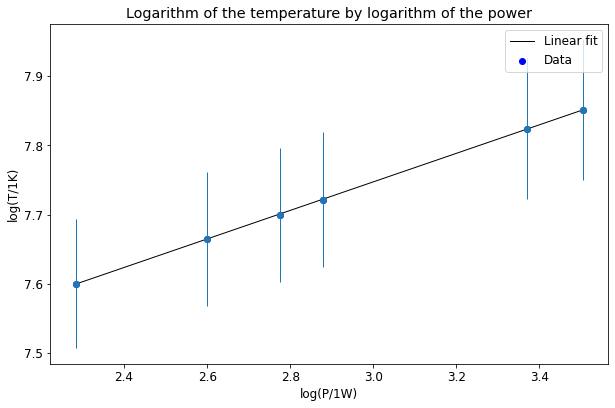

In [10]:
error_lnt = []
for i in range(len(list_lnT)):
    error_lnt.append(etm[i]/(2*T_m[i]))

print(list_lnPot, list_lnT)
plt.loglog(list_lnPot, list_lnT, color='blue', label='Data')
plt.errorbar(list_lnPot, list_lnT, yerr=error_lnt, fmt="o")
linear = []
for i in range(len(list_lnPot)):
    linear.append(c0_sb+c1_sb*list_lnPot[i])
plt.plot(list_lnPot, linear, 'black', label = 'Linear fit')
#plt.scatter(Pot, Tr4, color='red', label='Tr')
#plt.plot(Pot, (Ti4+Tr4)/2, color = 'black', label='Average')
plt.xlabel('log(P/1W)')
plt.ylabel('log(T/1K)')
plt.title('Logarithm of the temperature by logarithm of the power')
plt.legend()
plt.show()

In [42]:
l = 97e-3
d = 0.1778e-3
sigma_highest = Pot[5]/(np.pi*l*d*Tm4[5])
print(1/(2.3120e+13*np.pi*l*d))
print("e_T =", sigma_highest/5.67e-8)
print("e_T_2=", 7.982865400233912e-10/5.67e-8)

7.982865400233912e-10
e_T = 0.24811297926000844
e_T_2= 0.0140791276900069


In [6]:
charges_measured = [1.4256723978792294e-19, 
                    2.7799131371430147e-19, 
                    6.841428093179571e-19, 
                    3.0444177897829467e-19, 
                    2.3419048305283005e-19,
                    1.6512305854173612e-19,
                    1.1852997823112112e-18,
                    5.742610450630125e-19,
                    1.4075904881005605e-18,
                    5.3164349995342675e-19,
                    1.5603666413383012e-19]
n_measured = [1, 2, 4, 2, 1, 1, 7, 4, 9, 3, 1]

data = {'Charges':charges_measured,
        'n':n_measured}
 
# Create DataFrame
df = pd.DataFrame(data)
df.head()

,Charges,n
0,1.425672e-19,1
1,2.779913e-19,2
2,6.841428e-19,4
3,3.044418e-19,2
4,2.341905e-19,1


In [7]:
from lmfit import Model, Parameters

def fir_order(number_e, c0, e):
    return c0 + e*number_e

mod = Model(fir_order)
print('parameter names: {}'.format(mod.param_names))
print('independent variables: {}'.format(mod.independent_vars))

parameter names: ['c0', 'e']
independent variables: ['number_e']


In [8]:
params = mod.make_params(c0=0, e=1e-19)
result = mod.fit(df['Charges'], params, number_e=df['n'])

print(result.fit_report(min_correl=0.25))
dic_result = result.params.valuesdict()
print(dic_result)
c0 = dic_result['c0']
el = dic_result['e']

[[Model]]
    Model(fir_order)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 11
    # variables        = 2
    chi-square         = 2.1736e-38
    reduced chi-square = 2.4151e-39
    Akaike info crit   = -976.317203
    Bayesian info crit = -975.521412
[[Variables]]
    c0:  6.8474e-21 +/- 2.3683e-20 (345.86%) (init = 0)
    e:   1.5966e-19 +/- 5.8063e-21 (3.64%) (init = 1e-19)
[[Correlations]] (unreported correlations are < 0.250)
    C(c0, e) = -0.780
OrderedDict([('c0', 6.847397478246938e-21), ('e', 1.596561940198391e-19)])


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


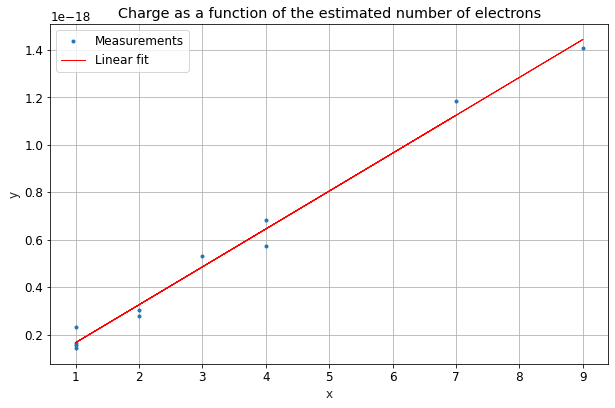

In [9]:
x = n_measured
y = c0+el*np.array(n_measured)
#print(y)

y2 = charges_measured
plt.plot(x, y2, '.', label='Measurements')
plt.plot(x, y, 'r', label="Linear fit")
plt.title('Charge as a function of the estimated number of electrons')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [1]:
c1 = 0.20651261 
delta = 2.6062e-04
exponent = 1/c1
delta_exponent = delta/(c1**2)
print(exponent, "+/-", delta_exponent)

4.842319314060289 +/- 0.006111032443153919
